In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time, datetime

In [3]:
def timeit(f, caption=""):
    now=time.time()
    r=f()
    duration = duration = str(datetime.timedelta(seconds=time.time()-now))
    print(caption+(" - " if(len(caption)>0) else "")+duration)
    return r

In [94]:
df=pd.read_gbq("""
select 
IFNULL(company, "NULL") as company, 
count(*) as num_trips,
AVG(trip_total) as avg_trip_total, 
AVG(trip_seconds) as avg_trip_seconds,
AVG(trip_total/trip_seconds) as avg_total_per_second,
AVG(trip_total/trip_miles) as avg_total_per_mile
from `bigquery-public-data.chicago_taxi_trips.taxi_trips`
where trip_seconds > 0
and trip_miles > 0
group by 1
""")

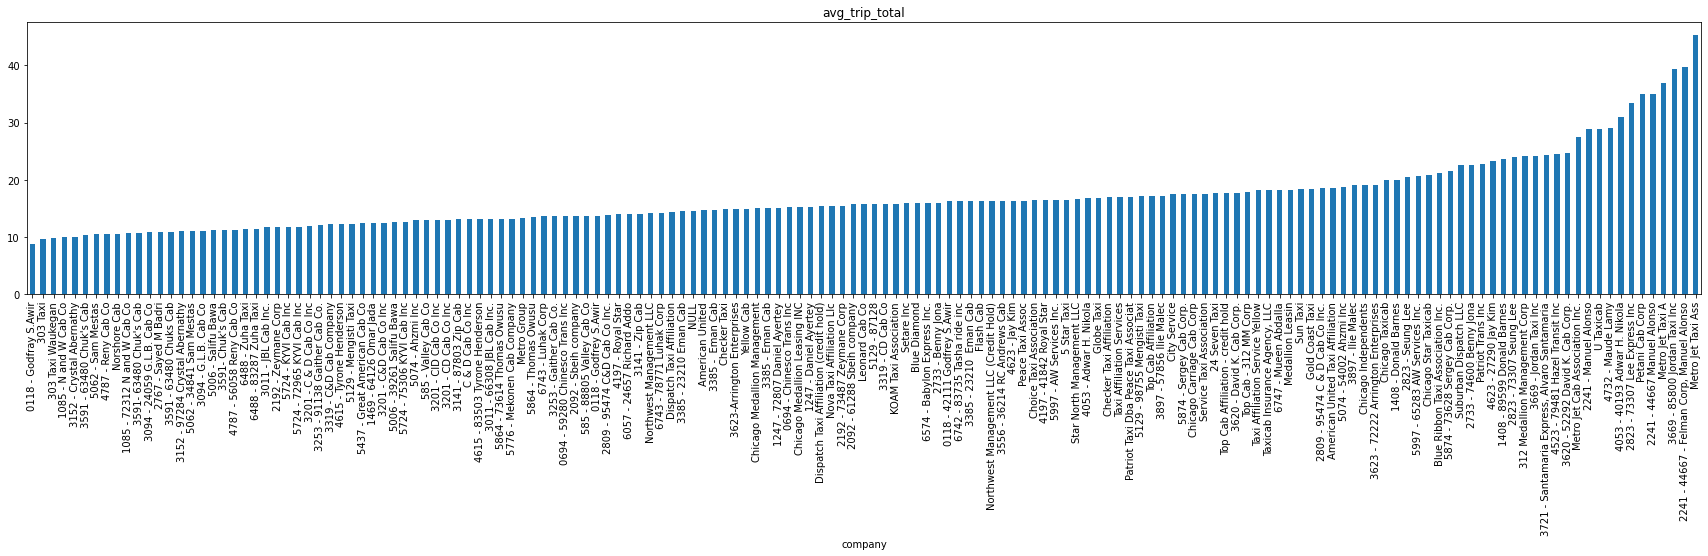

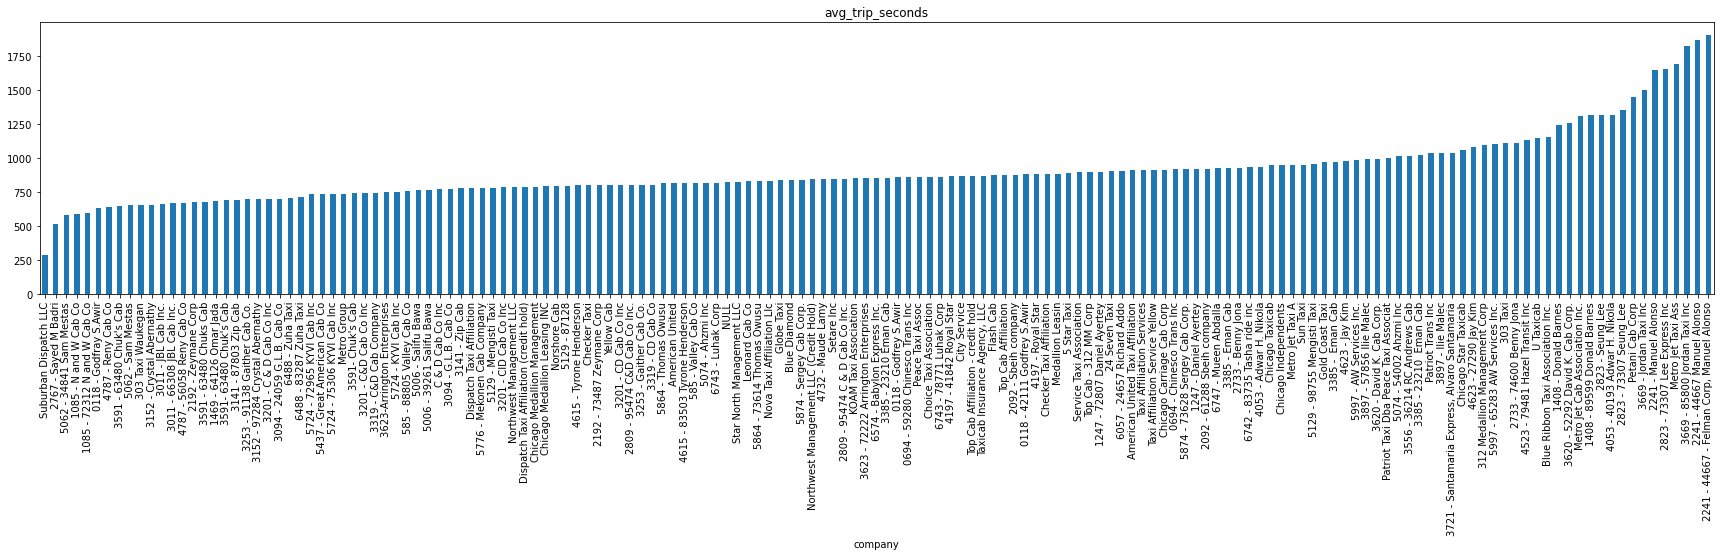

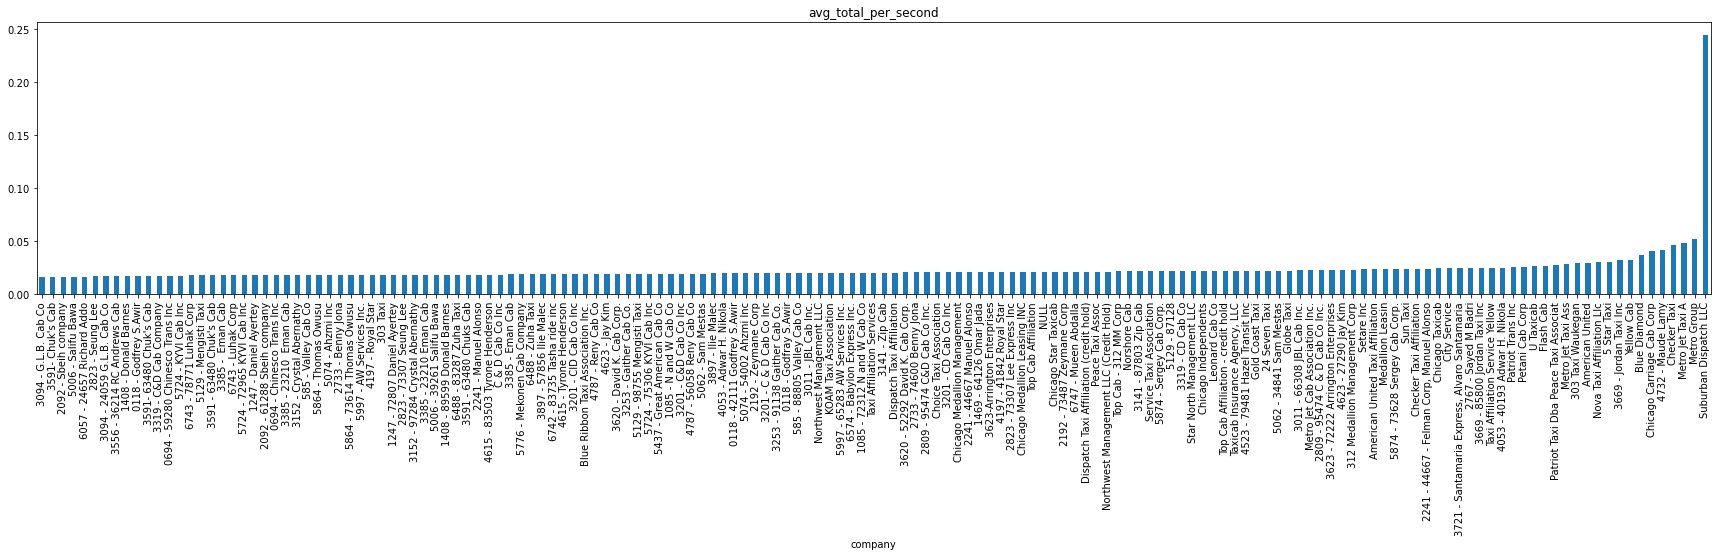

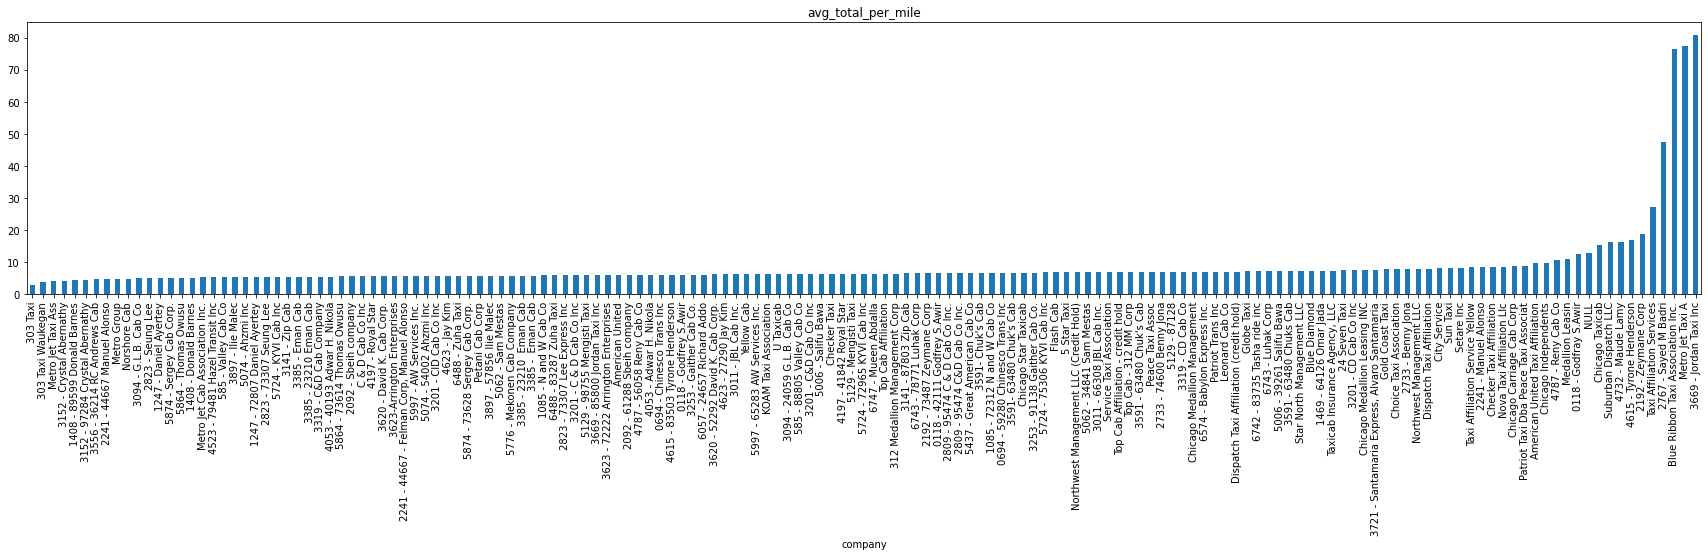

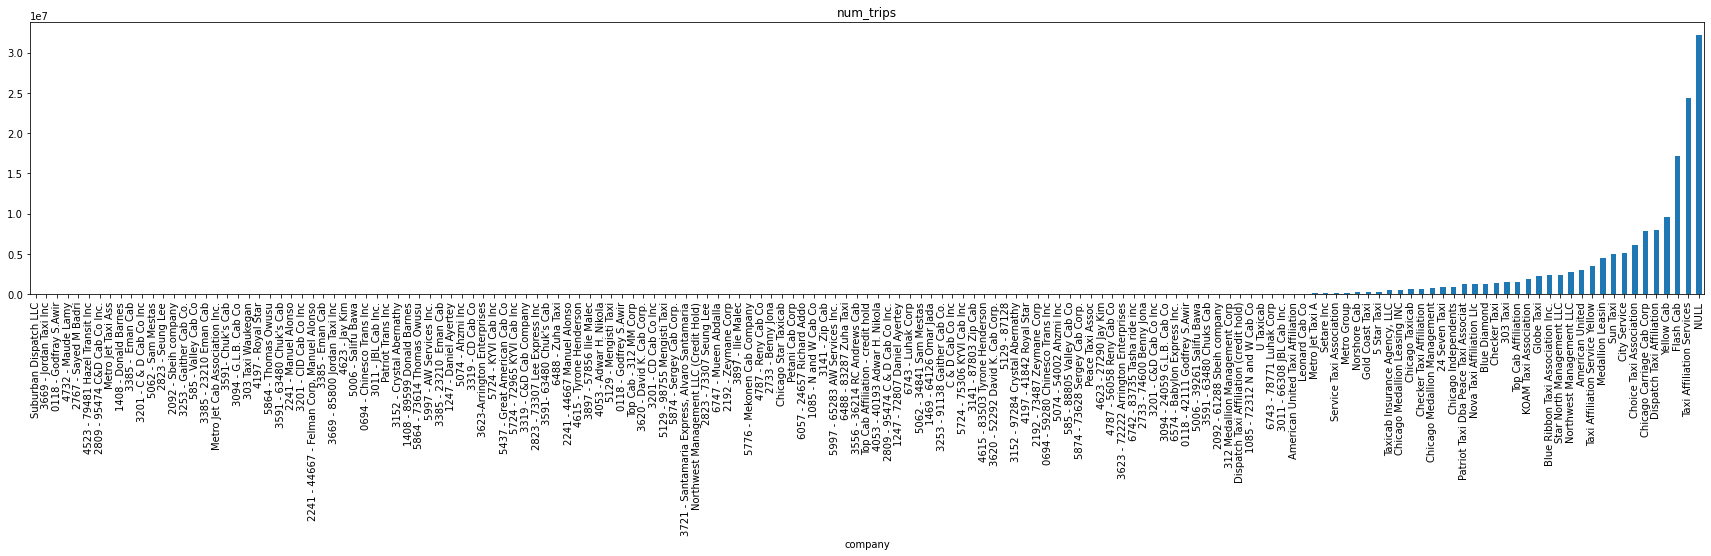

In [95]:
for c in ["avg_trip_total", "avg_trip_seconds", "avg_total_per_second", "avg_total_per_mile", "num_trips"]:
    plt.figure(figsize=(30,5))
    df.set_index("company").sort_values(c)[c].plot.bar(title=c)

<AxesSubplot:xlabel='avg_total_per_second', ylabel='avg_total_per_mile'>

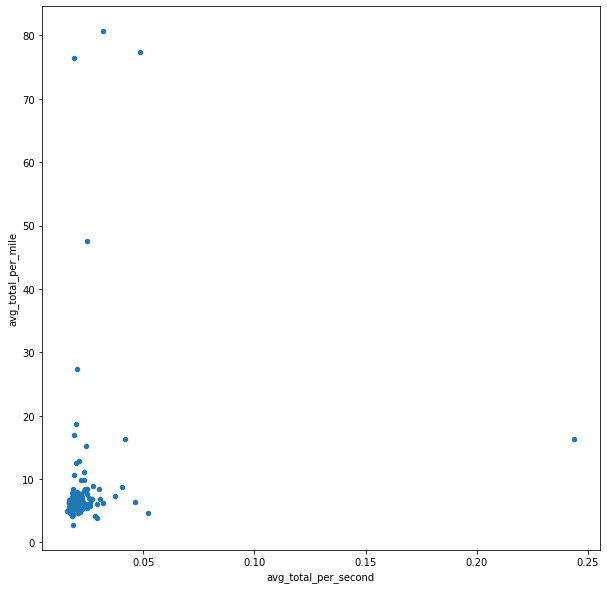

In [96]:
df.set_index("company").plot.scatter(x="avg_total_per_second", y="avg_total_per_mile", figsize=(10,10))

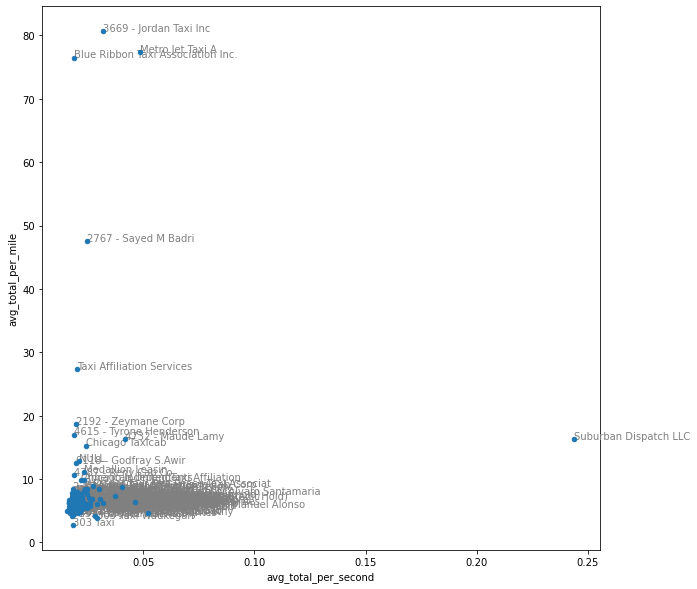

In [111]:
x="avg_total_per_second"
y="avg_total_per_mile"
l="company"
#sns.scatterplot(data=df,x=x,y=y)
df.set_index(l).plot.scatter(x=x, y=y, figsize=(10,10), zorder=10)
for i in range(df.shape[0]):
    plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
          fontdict=dict(size=10), color="grey")

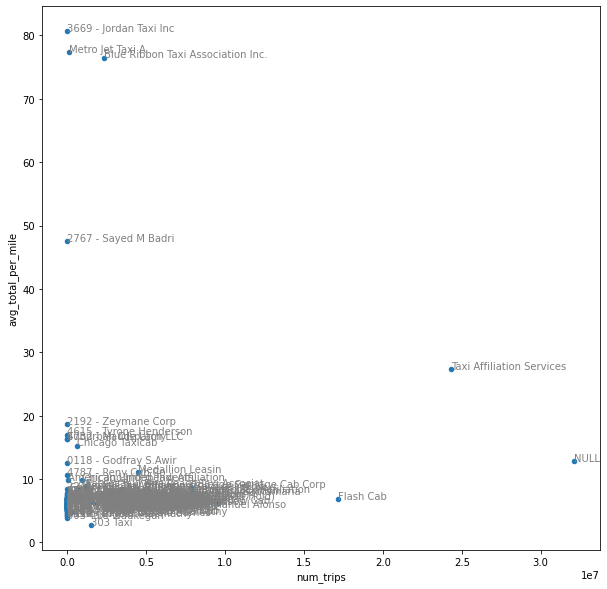

In [112]:
x="num_trips"
y="avg_total_per_mile"
l="company"
#sns.scatterplot(data=df,x=x,y=y)
df.set_index(l).plot.scatter(x=x, y=y, figsize=(10,10))
for i in range(df.shape[0]):
    plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
          fontdict=dict(size=10), color="grey")

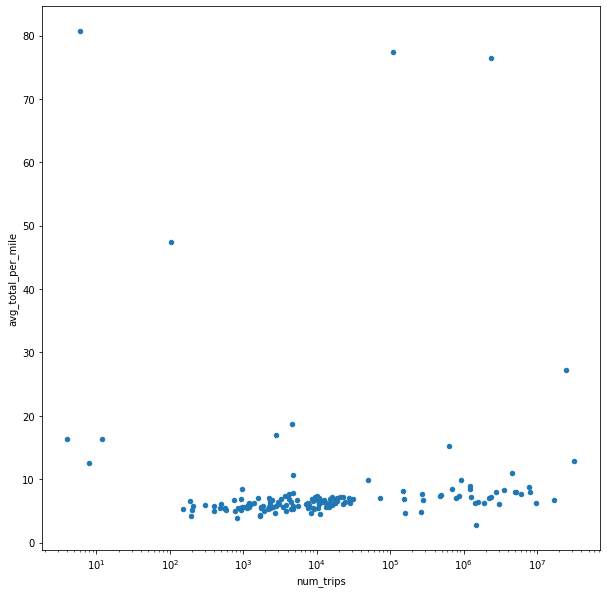

In [113]:
x="num_trips"
y="avg_total_per_mile"
l="company"
labels=False
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
df.set_index(l).plot.scatter(x=x, y=y, ax=ax)
if labels:
    for i in range(df.shape[0]):
        plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
              fontdict=dict(size=10))
#ax.set_yscale('log')
ax.set_xscale('log')

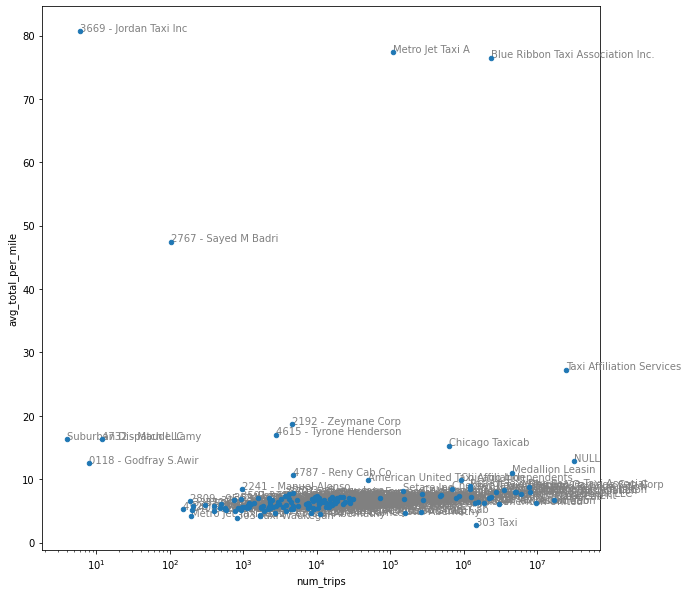

In [114]:
x="num_trips"
y="avg_total_per_mile"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(df.shape[0]):
        plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
              fontdict=dict(size=10), color="grey")
#ax.set_yscale('log')
ax.set_xscale('log')

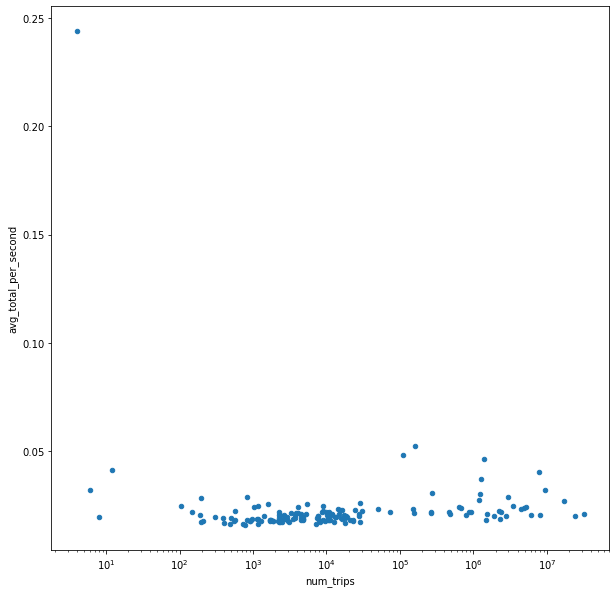

In [101]:
x="num_trips"
y="avg_total_per_second"
l="company"
labels=False
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
df.set_index(l).plot.scatter(x=x, y=y, ax=ax)
if labels:
    for i in range(df.shape[0]):
        plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
              fontdict=dict(size=10))
#ax.set_yscale('log')
ax.set_xscale('log')

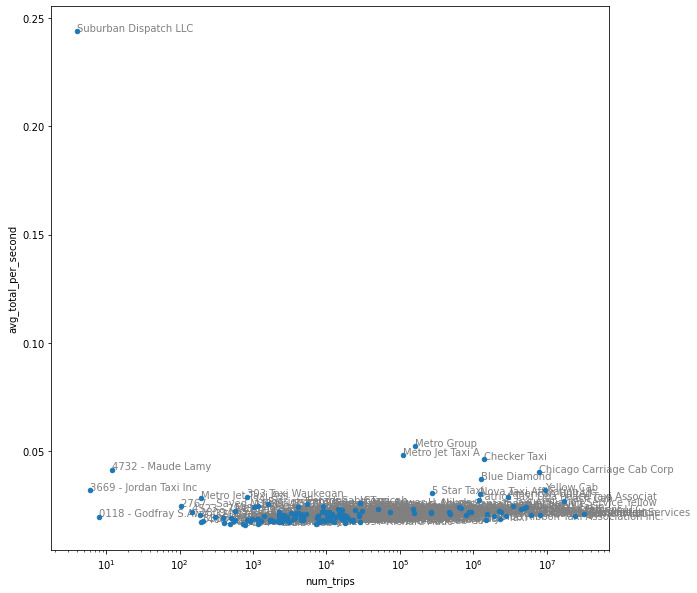

In [115]:
x="num_trips"
y="avg_total_per_second"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(df.shape[0]):
        plt.text(x=df[x][i],y=df[y][i],s=df[l][i], 
              fontdict=dict(size=10), color="grey")
#ax.set_yscale('log')
ax.set_xscale('log')

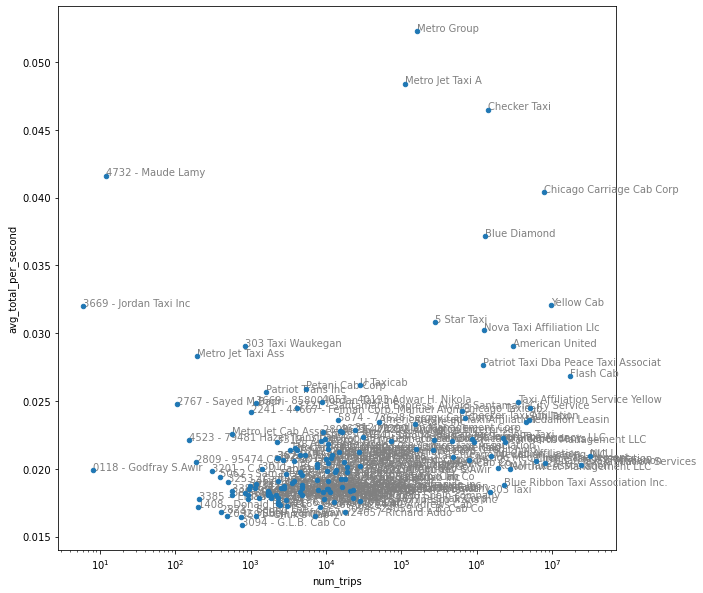

In [103]:
# excluding the outlier
x="num_trips"
y="avg_total_per_second"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
current_df=df[df["avg_total_per_second"]<0.15]
current_df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(current_df.shape[0]):
        try:
            plt.text(x=current_df[x][i],y=current_df[y][i],s=current_df[l][i], 
                  fontdict=dict(size=10, color="grey"))
        except:
            pass
#ax.set_yscale('log')
ax.set_xscale('log')

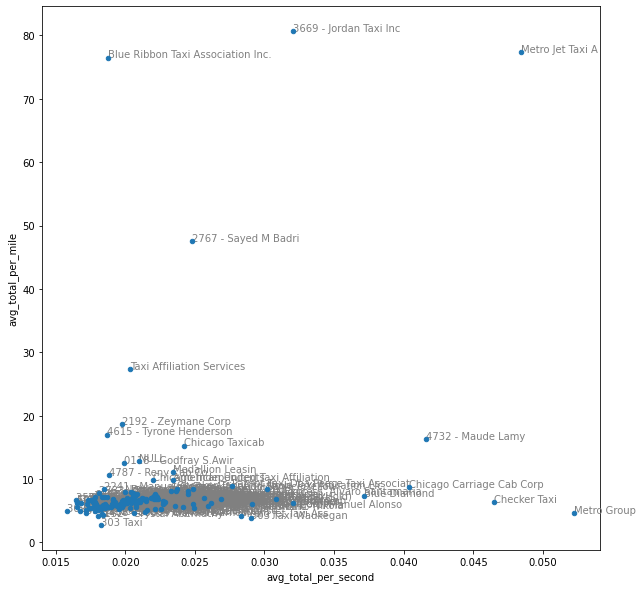

In [108]:
# excluding the outlier
x="avg_total_per_second"
y="avg_total_per_mile"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
current_df=df[df["avg_total_per_second"]<0.15]
current_df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(current_df.shape[0]):
        try:
            plt.text(x=current_df[x][i],y=current_df[y][i],s=current_df[l][i], 
                  fontdict=dict(size=10, color="grey"))
        except:
            pass
#ax.set_yscale('log')
#ax.set_xscale('log')

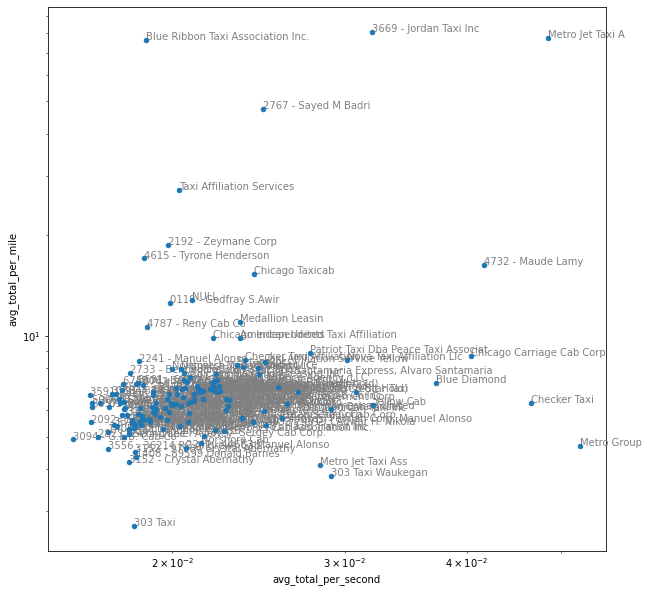

In [110]:
# excluding the outlier
x="avg_total_per_second"
y="avg_total_per_mile"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
current_df=df[df["avg_total_per_second"]<0.15]
current_df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(current_df.shape[0]):
        try:
            plt.text(x=current_df[x][i],y=current_df[y][i],s=current_df[l][i], 
                  fontdict=dict(size=10, color="grey"))
        except:
            pass
ax.set_yscale('log')
ax.set_xscale('log')

In [106]:
current_df["avg_total_per_second"].describe()

count    156.000000
mean       0.021616
std        0.005628
min        0.015828
25%        0.018408
50%        0.020270
75%        0.022237
max        0.052274
Name: avg_total_per_second, dtype: float64

In [107]:
current_df["avg_total_per_mile"].describe()

count    156.000000
mean       8.516474
std       10.666860
min        2.708868
25%        5.628790
50%        6.326727
75%        7.182798
max       80.695304
Name: avg_total_per_mile, dtype: float64

## considerations
(an outlier with very high avg_total_per_second and low support has been excluded from the following considerations)
* avg_total_per_second varies in [0.015828, 0.052274], most companies are below 0.025, some are between 0.025 and 0.035 and few are above 0.035
    * records with null value as company stay below 0.025 with the majority of data
* avg_total_per_mile varies in [2.708868, 80.695304], most companies are below 9, some are between 9 and 30 and few are above 30
    * records with null value as company stay between 9 and 30. This time they don't stay with the majority of the data.
  
if we want to divide companies in three categories we cold define:
* normal: avg_total_per_second < 0.25 and avg_total_per_mile < 9
* expensive: avg_total_per_second in [0.025, 0.035] or avg_total_per_mile in [9, 30]
* luxury: avg_total_per_second > 0.035 or avg_total_per_mile > 30
  
Another possibility could be to just provide the avg_total_per_second and avg_total_per_mile as an input feature derived from the company through a mapping.  
In this case it would probably be correct to extract these informations as historical data: from the years before 2017 if our train set is in the year 2017.


In [117]:
df_history=pd.read_gbq("""
select 
IFNULL(company, "NULL") as company, 
count(*) as num_trips,
AVG(trip_total) as avg_trip_total, 
AVG(trip_seconds) as avg_trip_seconds,
AVG(trip_total/trip_seconds) as avg_total_per_second,
AVG(trip_total/trip_miles) as avg_total_per_mile
from `bigquery-public-data.chicago_taxi_trips.taxi_trips`
where trip_seconds > 0
and trip_miles > 0
and EXTRACT(YEAR FROM trip_start_timestamp) < 2017
group by 1
""")

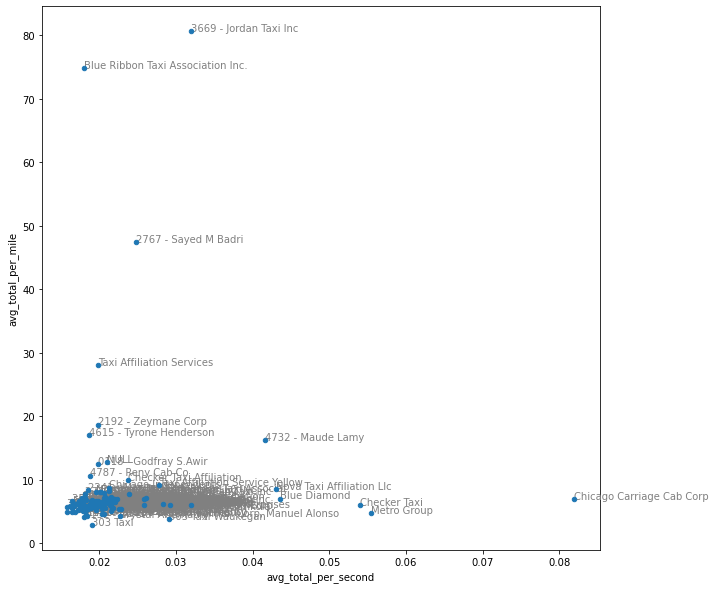

In [119]:
# excluding the outlier
x="avg_total_per_second"
y="avg_total_per_mile"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
current_df=df_history[df_history["avg_total_per_second"]<0.15]
current_df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(current_df.shape[0]):
        try:
            plt.text(x=current_df[x][i],y=current_df[y][i],s=current_df[l][i], 
                  fontdict=dict(size=10, color="grey"))
        except:
            pass
#ax.set_yscale('log')
#ax.set_xscale('log')

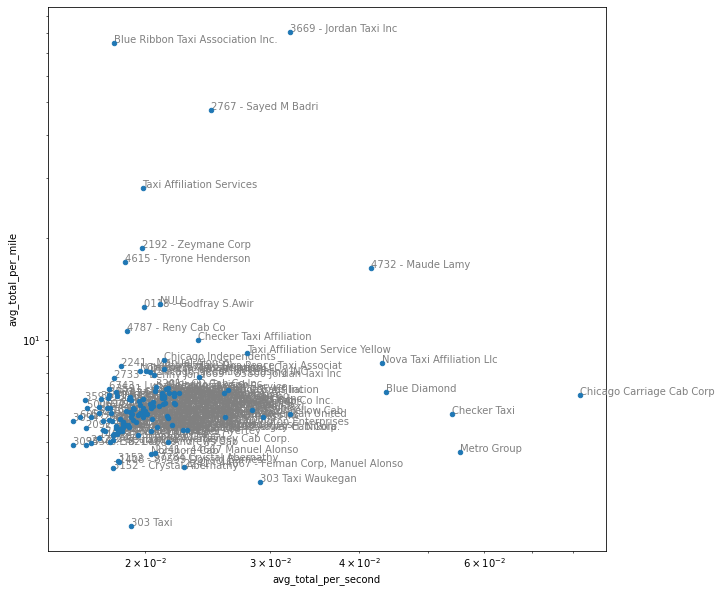

In [120]:
# excluding the outlier
x="avg_total_per_second"
y="avg_total_per_mile"
l="company"
labels=True
fig = plt.figure(figsize=(10,10))
ax = plt.gca()
current_df=df_history[df_history["avg_total_per_second"]<0.15]
current_df.set_index(l).plot.scatter(x=x, y=y, ax=ax, zorder=10)
if labels:
    for i in range(current_df.shape[0]):
        try:
            plt.text(x=current_df[x][i],y=current_df[y][i],s=current_df[l][i], 
                  fontdict=dict(size=10, color="grey"))
        except:
            pass
ax.set_yscale('log')
ax.set_xscale('log')

## Consclusions
Considerations still hold true for years before 2017, so we can justify the use of this data as coming from historical logs.
from this data we could provide to the model:
* avg_total_per_second and avg_total_per_mile as a mapping obtained from the company in historical data
* one of the classes in {normal, expensive, luxury} as a mapping obtained from the company in historical data
* both?

# Mapping

In [124]:
df_mapping=df_history[["company","avg_trip_total", "avg_trip_seconds", "avg_total_per_second", "avg_total_per_mile"]].set_index("company")
df_mapping["category"]=df_mapping.apply(
    lambda x: "normal" if x["avg_total_per_second"] < 0.25 and x["avg_total_per_mile"] < 9 
    else ("luxury" if x["avg_total_per_second"] > 0.035 or x["avg_total_per_mile"] > 30 else "expensive")
, axis=1)
df_mapping

,avg_trip_total,avg_trip_seconds,avg_total_per_second,avg_total_per_mile,category
company,,,,,
1408 - 89599 Donald Barnes,23.571501,1312.704626,0.018366,4.363849,normal
5129 - 98755 Mengisti Taxi,17.090162,954.672674,0.019106,5.945214,normal
Globe Taxi,16.820624,855.468572,0.021594,6.964683,normal
5 Star Taxi,14.188514,802.025145,0.028272,6.224555,normal
2809 - 95474 C&D Cab Co Inc.,13.918717,803.422460,0.020481,6.565762,normal
...,...,...,...,...,...
2823 - 73307 Lee Express Inc,32.338587,1623.479888,0.020438,5.856744,normal
5997 - AW Services Inc.,16.512142,988.359240,0.018199,5.605967,normal
2241 - Manuel Alonso,28.840433,1644.101480,0.018503,8.385748,normal


In [125]:
df_mapping["category"].value_counts()

normal       130
expensive      8
luxury         5
Name: category, dtype: int64

In [128]:
df_mapping.to_dict(orient="index")

{'1408 - 89599 Donald Barnes': {'avg_trip_total': 23.571500593119804,
  'avg_trip_seconds': 1312.7046263345194,
  'avg_total_per_second': 0.018365944275541154,
  'avg_total_per_mile': 4.363848671003216,
  'category': 'normal'},
 '5129 - 98755 Mengisti Taxi': {'avg_trip_total': 17.09016167505963,
  'avg_trip_seconds': 954.6726742645109,
  'avg_total_per_second': 0.019106167049067504,
  'avg_total_per_mile': 5.945213735178227,
  'category': 'normal'},
 'Globe Taxi': {'avg_trip_total': 16.820623633162107,
  'avg_trip_seconds': 855.4685716054613,
  'avg_total_per_second': 0.021594368162708443,
  'avg_total_per_mile': 6.964682692805985,
  'category': 'normal'},
 '5 Star Taxi': {'avg_trip_total': 14.188513576742128,
  'avg_trip_seconds': 802.0251452304021,
  'avg_total_per_second': 0.028272282414084155,
  'avg_total_per_mile': 6.224554996781883,
  'category': 'normal'},
 '2809 - 95474 C&D Cab Co Inc.': {'avg_trip_total': 13.91871657754011,
  'avg_trip_seconds': 803.4224598930482,
  'avg_tota